## PSTAT 160A Summer 2023 Python Exercise 2

**Section date:** Friday, August 18th <br>


__This exercise complements Exercise Problem 2.2__:

Suppose you are rolling a fair die 600 times independently. Let
$X$ count the number of sixes that appear. Let's make a function <tt>simulateSixes</tt> to simulate $X$.

Observe that one roll will yield a six with probability 1/6.

As usual, we start with loading some packages:

In [1]:
import numpy as np
import random

Below we create a function that counts number of sixes across specified number of rolls


In [2]:
# The following function returns the simulations of the number of sixes, i.e. the realization
# of a Binomial(600,1/6) random variable
def simulateSixes(numberOfRolls):
    # Sample with discrete uniform
    sample = np.random.choice([1,2,3,4,5,6],size = numberOfRolls)
    # Count the number of sixes
    sixes = np.count_nonzero(sample == 6)
    return sixes

In [3]:
zz = simulateSixes(600)
zz

109

### Exact probability

What is the probability that the number of sixes is less than **90** (*substitute your own number!*)? Here is the exact answer: $$\sum_{k=0}^{89} p(k)$$ where $p$ is the p.m.f of Binomial(600,1/6) random variable. We can directly sum its pmf or we can of course also use the cdf (note that range(90) means that we want the cdf at 89):

In [4]:
from scipy.stats import binom

# Way 1: Sum up PMF to get cumulative probability
rv = binom(600, 1./6.)

prob = 0
for i in range(90):
    prob = prob + rv.pmf(i)
print(prob)

# Way 2: Directly use CDF value, CDF: F(x) = Prob(X <= x)
print(rv.cdf(89))

0.1241256086421878
0.12412560864218779


### Monte Carlo

Suppose we wish to estimate using Monte Carlo the above probability. To do so, we generate samples of simulateSixes and then record how often they are below 90:

In [5]:
np.random.seed(20)
# Estimate using Monte Carlo for 100 simulations of Binomial(600,1/6) random variable
sixesSamples = np.zeros((100, 1))
for i in range(100):
    sixesSamples[i] = sixesSamples[i] + (simulateSixes(600) < 90) # An indicator

Finally we make a plot showing the running average of sixesSamples (using cumsum) and also displaying the corresponding empirical intervals implied by the Central Limit Theorem [**explain** this live during section]

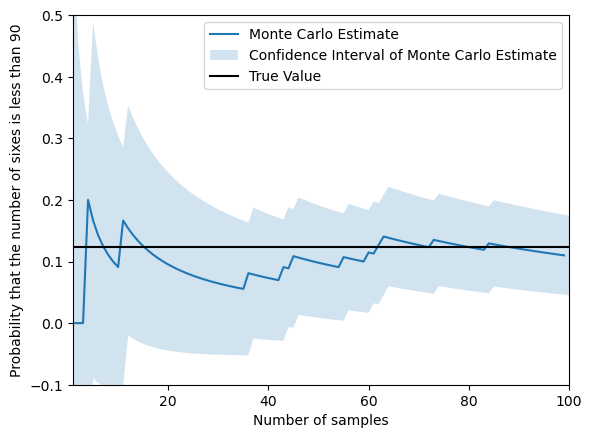

In [11]:
import matplotlib.pyplot as plt

# Running estimate for different number of samples used in MC
# Two list cannot divide each other, but two arrays can
# If one divide two arrays, the division is done in a component-wise way
runEst = np.cumsum(sixesSamples) / np.arange(1,101)
fig, ax = plt.subplots()
plt.plot(runEst, label = 'Monte Carlo Estimate')


# This is the standard error of the estimate -- which in my code uses the true standard deviation of the 
# Bernoulli random variable with p=0.124. Should be replaced with the empirical standard deviation if we 
# are doing real statistics
estVar = np.ones(100) * rv.cdf(89) * (1 - rv.cdf(89)) / np.arange(1,101)

## Display the confidence interval
# plt.plot(runEst + 1.96 * np.sqrt(estVar), color='red', linewidth=0.5 )
# plt.plot(runEst - 1.96 * np.sqrt(estVar), color='red', linewidth=0.5 )
ax.fill_between(range(1,101), runEst - 1.96 * np.sqrt(estVar), runEst + 1.96 * np.sqrt(estVar), 
                alpha=0.2, label = 'Confidence Interval of Monte Carlo Estimate')

plt.axhline(y = rv.cdf(89), color='k', linestyle='-', label = 'True Value')
plt.xlabel('Number of samples')
plt.ylabel('Probability that the number of sixes is less than 90')
plt.legend()
plt.xlim([1, 100]); plt.ylim([-0.1, 0.5])
plt.show()

Observe that the interval for small $n$ goes below zero which makes no sense but it's because the CLT is oblivious of the fact that we are estimating a probability, so it "doesn't know" that the answer is guaranteed to be positive. The CLT only makes use of the mean and variance, no other properties. 